In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=625c8b53ac5bd9769d3b67f7610ba596


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | paracelis
Processing Record 2 of Set 13 | bambous virieux
Processing Record 3 of Set 13 | rikitea
Processing Record 4 of Set 13 | salalah
Processing Record 5 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 13 | tasiilaq
Processing Record 7 of Set 13 | saskylakh
Processing Record 8 of Set 13 | coahuayana
Processing Record 9 of Set 13 | clyde river
Processing Record 10 of Set 13 | punta arenas
Processing Record 11 of Set 13 | victoria
Processing Record 12 of Set 13 | port alfred
Processing Record 13 of Set 13 | saldanha
Processing Record 14 of Set 13 | ambilobe
Processing Record 15 of Set 13 | port elizabeth
Processing Record 16 of Set 13 | chuy
Processing Record 17 of Set 13 | bethel
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | sur
Processing Record 20 of Set 13 | albany
Processing Record 21 of Set 13 | marcona
City not found. Skipping...
P

Processing Record 31 of Set 16 | salcininkai
Processing Record 32 of Set 16 | bay roberts
Processing Record 33 of Set 16 | olga
Processing Record 34 of Set 16 | beira
Processing Record 35 of Set 16 | kurilsk
Processing Record 36 of Set 16 | hermanus
Processing Record 37 of Set 16 | jian
Processing Record 38 of Set 16 | qaqortoq
Processing Record 39 of Set 16 | mayo
Processing Record 40 of Set 16 | ugoofaaru
Processing Record 41 of Set 16 | aktau
Processing Record 42 of Set 16 | mabaruma
Processing Record 43 of Set 16 | ganzhou
Processing Record 44 of Set 16 | hvide sande
Processing Record 45 of Set 16 | port macquarie
Processing Record 46 of Set 16 | maicao
Processing Record 47 of Set 16 | esperance
Processing Record 48 of Set 16 | hamilton
Processing Record 49 of Set 16 | tobol
Processing Record 50 of Set 16 | portland
Processing Record 1 of Set 17 | airai
Processing Record 2 of Set 17 | grado
Processing Record 3 of Set 17 | moree
Processing Record 4 of Set 17 | havre-saint-pierre
Pro

Processing Record 20 of Set 20 | santa rosa
Processing Record 21 of Set 20 | bangassou
Processing Record 22 of Set 20 | makung
City not found. Skipping...
Processing Record 23 of Set 20 | san cristobal
Processing Record 24 of Set 20 | fernie
Processing Record 25 of Set 20 | mogok
Processing Record 26 of Set 20 | kitimat
Processing Record 27 of Set 20 | kutum
Processing Record 28 of Set 20 | skalistyy
City not found. Skipping...
Processing Record 29 of Set 20 | weiser
Processing Record 30 of Set 20 | cherskiy
Processing Record 31 of Set 20 | quincy
Processing Record 32 of Set 20 | shenjiamen
Processing Record 33 of Set 20 | kloulklubed
Processing Record 34 of Set 20 | ilulissat
Processing Record 35 of Set 20 | mazabuka
Processing Record 36 of Set 20 | itarema
Processing Record 37 of Set 20 | superior
Processing Record 38 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 39 of Set 20 | constantine
Processing Record 40 of Set 20 | avera
Processing Record 41 of Set 20 | na

Processing Record 3 of Set 24 | bontang
Processing Record 4 of Set 24 | falkoping
City not found. Skipping...
Processing Record 5 of Set 24 | bissau
Processing Record 6 of Set 24 | beringovskiy
Processing Record 7 of Set 24 | huejotzingo
Processing Record 8 of Set 24 | bredy
Processing Record 9 of Set 24 | marsabit
Processing Record 10 of Set 24 | hammerfest
Processing Record 11 of Set 24 | george
Processing Record 12 of Set 24 | louisbourg
City not found. Skipping...
Processing Record 13 of Set 24 | bodden town
Processing Record 14 of Set 24 | puri
Processing Record 15 of Set 24 | peniche
Processing Record 16 of Set 24 | bagotville
Processing Record 17 of Set 24 | sioux lookout
Processing Record 18 of Set 24 | benguela
Processing Record 19 of Set 24 | tambura
Processing Record 20 of Set 24 | moissac
Processing Record 21 of Set 24 | ozernovskiy
Processing Record 22 of Set 24 | escanaba
Processing Record 23 of Set 24 | teguldet
Processing Record 24 of Set 24 | katobu
Processing Record 2

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paracelis,17.2667,121.4667,85.57,60,90,4.45,PH,2021-03-31 03:14:53
1,Bambous Virieux,-20.3428,57.7575,80.01,94,20,6.91,MU,2021-03-31 03:14:53
2,Rikitea,-23.1203,-134.9692,79.07,69,11,14.54,PF,2021-03-31 03:14:53
3,Salalah,17.0151,54.0924,77.00,47,0,1.14,OM,2021-03-31 03:10:03
4,Tasiilaq,65.6145,-37.6368,30.20,93,90,18.41,GL,2021-03-31 03:14:54
5,Saskylakh,71.9167,114.0833,-18.06,98,100,9.04,RU,2021-03-31 03:14:54
6,Coahuayana,18.7333,-103.6833,72.52,67,78,1.36,MX,2021-03-31 03:14:54
7,Clyde River,70.4692,-68.5914,-5.80,84,1,16.11,CA,2021-03-31 03:14:54
8,Punta Arenas,-53.1500,-70.9167,35.60,87,0,3.44,CL,2021-03-31 03:12:12
9,Victoria,22.2855,114.1577,80.01,74,87,10.00,HK,2021-03-31 03:14:27


In [11]:
new_column_order = ["City", "Country", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paracelis,PH,17.2667,121.4667,85.57,60,90,4.45
1,Bambous Virieux,MU,-20.3428,57.7575,80.01,94,20,6.91
2,Rikitea,PF,-23.1203,-134.9692,79.07,69,11,14.54
3,Salalah,OM,17.0151,54.0924,77.00,47,0,1.14
4,Tasiilaq,GL,65.6145,-37.6368,30.20,93,90,18.41
5,Saskylakh,RU,71.9167,114.0833,-18.06,98,100,9.04
6,Coahuayana,MX,18.7333,-103.6833,72.52,67,78,1.36
7,Clyde River,CA,70.4692,-68.5914,-5.80,84,1,16.11
8,Punta Arenas,CL,-53.1500,-70.9167,35.60,87,0,3.44
9,Victoria,HK,22.2855,114.1577,80.01,74,87,10.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617160610.830865

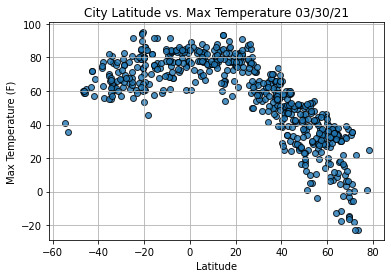

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

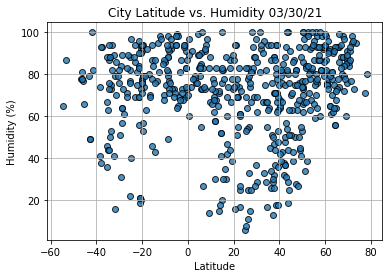

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

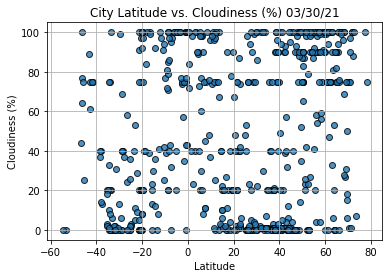

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

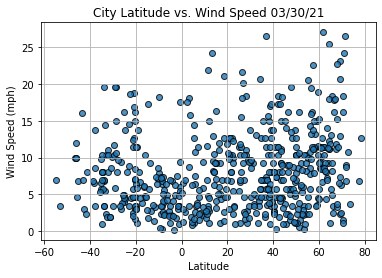

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [20]:
index13 = city_data_df.loc[13]

In [21]:
index13

City          Port Elizabeth
Country                   ZA
Lat                  -33.918
Lng                  25.5701
Max Temp                62.6
Humidity                  88
Cloudiness                20
Wind Speed             19.57
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
567     True
568    False
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paracelis,PH,17.2667,121.4667,85.57,60,90,4.45
3,Salalah,OM,17.0151,54.0924,77.00,47,0,1.14
4,Tasiilaq,GL,65.6145,-37.6368,30.20,93,90,18.41
5,Saskylakh,RU,71.9167,114.0833,-18.06,98,100,9.04
6,Coahuayana,MX,18.7333,-103.6833,72.52,67,78,1.36
...,...,...,...,...,...,...,...,...
564,Amethi,IN,26.1500,81.8167,87.91,11,0,15.46
567,Sangueya,GN,10.7000,-14.3667,75.79,73,98,2.82
569,Changchun,CN,43.8800,125.3228,60.01,19,0,8.95
570,Amberley,US,39.2048,-84.4280,66.20,48,90,17.27


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paracelis,PH,17.2667,121.4667,85.57,60,90,4.45
3,Salalah,OM,17.0151,54.0924,77.00,47,0,1.14
4,Tasiilaq,GL,65.6145,-37.6368,30.20,93,90,18.41
5,Saskylakh,RU,71.9167,114.0833,-18.06,98,100,9.04
6,Coahuayana,MX,18.7333,-103.6833,72.52,67,78,1.36


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

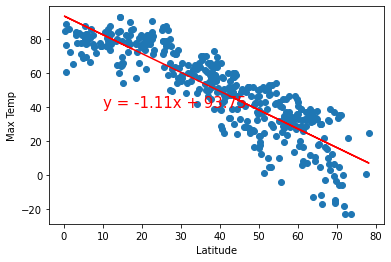

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

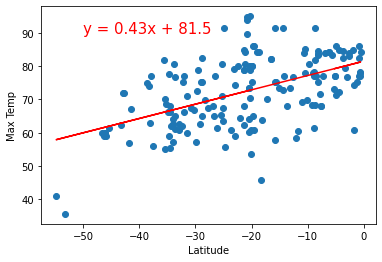

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


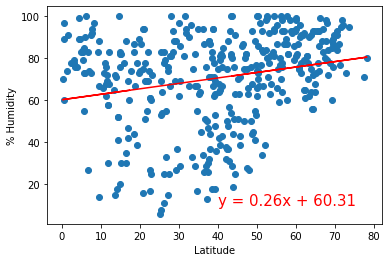

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

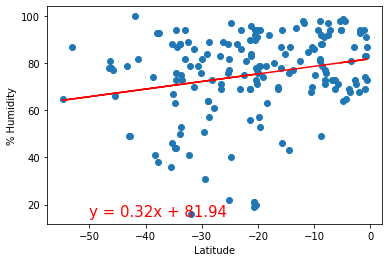

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

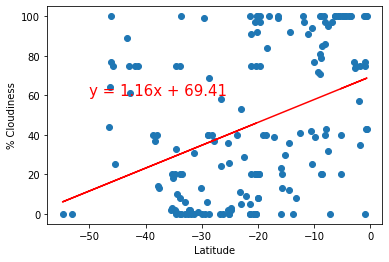

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


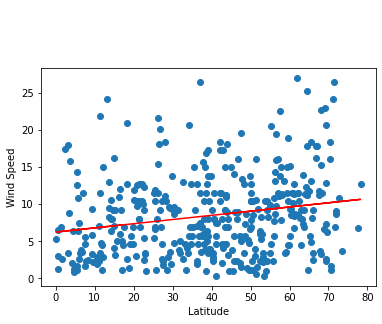

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


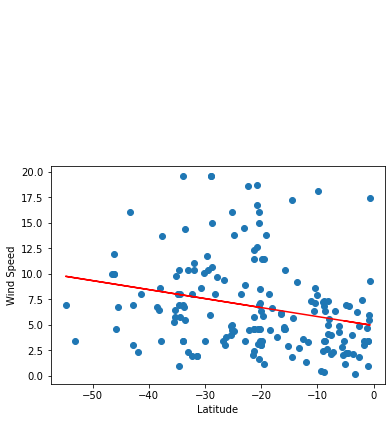

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))